In [ ]:
!pip install scikit-learn

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 13.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

##Labelling Data & Preprocessing

In [ ]:
selected_columns = ['Summary', 'Priority']
data_terlabeli = pd.read_csv('bugs-2024-12-14_libreoffice.csv', sep=';', usecols=selected_columns)

In [ ]:
import nltk
import re
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

Lemmatizer = WordNetLemmatizer()

important_words = {'not', 'no', 'don’t', 'cannot'}
custom_stopwords = set(stopwords.words('english')) - important_words

def show_preprocessing_steps(text):
    if not isinstance(text, str):
        return "", []

    text = contractions.fix(text)
    text = text.lower()
    text = re.sub(r"#(\w+)", r"\1", text)
    text = re.sub(r"\b\d+\b", "", text)
    text = re.sub(r"[^a-zA-Z\s.-]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()

    words = text.split()
    combined_words = []
    skip_next = False

    for i in range(len(words)):
        if skip_next:
            skip_next = False
            continue
        if words[i] in {'not', 'no','don’t', 'cannot'} and i + 1 < len(words):
            combined = words[i] + '_' + words[i + 1]
            combined_words.append(combined)
            skip_next = True
        elif words[i] not in custom_stopwords and len(words[i]) > 2:
            combined_words.append(words[i])

    lemmatized_words = [Lemmatizer.lemmatize(word) for word in combined_words]

    processed_text = ' '.join(lemmatized_words)
    return processed_text, lemmatized_words


In [ ]:
def categorize_priority(priority):
  if priority in ['high', 'highest']:
    return 'Tinggi'
  elif priority == 'medium':
    return 'Sedang'
  elif priority in ['low', 'lowest']:
    return 'Rendah'
  else:
    return None

In [ ]:
data_terlabeli['Priority'] = data_terlabeli['Priority'].apply(categorize_priority)
data_terlabeli = data_terlabeli.dropna(subset=['Priority'])
processed_results = data_terlabeli['Summary'].apply(show_preprocessing_steps)
data_terlabeli['Processed_Summary'] = processed_results.apply(lambda x: x[0])
data_terlabeli['tokens'] = processed_results.apply(lambda x: x[1])

In [ ]:
print(data_terlabeli[['Summary', 'Processed_Summary']].head(10))

                                             Summary  \
0  Scrollbar for (some?) dialogs is choppy on Win...   
1   [META] Desktop integration bugs and enhancements   
2    Libreoffice leave tmp files in with new version   
3      [META] Validity-related bugs and enhancements   
4  Calc - New line in Data Validity Cell Range br...   
5  Libre spreadsheets don't pop up surface pro on...   
6              [META] Toolbars bugs and enhancements   
7     [META] Sidebar UI and UX bugs and enhancements   
8  Mouse hover border is disabled if an element i...   
9                 [META] Macro bugs and enhancements   

                                   Processed_Summary  
0                     scrollbar dialog choppy window  
1           meta desktop integration bug enhancement  
2             libreoffice leave tmp file new version  
3              meta validity-related bug enhancement  
4  calc new line data validity cell range break c...  
5  libre spreadsheet not_pop surface pro onscreen... 

In [ ]:
priority_counts = data_terlabeli['Priority'].value_counts()
print("Distribusi Priority pada data terlabeli:")
print(priority_counts)
print(f"Total data terlabeli: {len(data_terlabeli)}")

Distribusi Priority pada data terlabeli:
Priority
Sedang    15091
Rendah     1340
Tinggi      319
Name: count, dtype: int64
Total data terlabeli: 16750


In [ ]:
print(data_terlabeli)

                                                 Summary Priority  \
0      Scrollbar for (some?) dialogs is choppy on Win...   Sedang   
1       [META] Desktop integration bugs and enhancements   Sedang   
2        Libreoffice leave tmp files in with new version   Rendah   
3          [META] Validity-related bugs and enhancements   Sedang   
4      Calc - New line in Data Validity Cell Range br...   Sedang   
...                                                  ...      ...   
16860  CONDITIONAL FORMATTING: Option for reunify ran...   Sedang   
16861  'Pick a Color' dialog: Give option to add a co...   Sedang   
16862               Means to rename stored custom colors   Sedang   
16863  Make 'Current selection only' in Find and Repl...   Sedang   
16864  Allow "see" and "see also" entries in an Alpha...   Sedang   

                                       Processed_Summary  \
0                         scrollbar dialog choppy window   
1               meta desktop integration bug enhanc

In [ ]:
sample_rendah = data_terlabeli[data_terlabeli['Priority'] == 'Rendah'].sample(n=300, random_state=42)
sample_sedang = data_terlabeli[data_terlabeli['Priority'] == 'Sedang'].sample(n=300, random_state=42)
sample_tinggi = data_terlabeli[data_terlabeli['Priority'] == 'Tinggi'].sample(n=300, random_state=42)

data_sample = pd.concat([sample_rendah, sample_sedang, sample_tinggi], ignore_index=True)

In [ ]:
selected_columns = ['Summary']
df1 = pd.read_csv('bugs-2024-12-14_ASF.csv', sep=';', usecols=selected_columns)
df2 = pd.read_csv('bugs-2024-12-14_eclipseide.csv', sep=';', usecols=selected_columns)
df3 = pd.read_csv('bugs-2024-12-14_linux kernel.csv', sep=';', usecols=selected_columns)
df4 = pd.read_csv('bugs-mozilla.csv', sep=';', usecols=selected_columns)

In [ ]:
df_unlabeled = pd.concat([df1, df2, df3, df4], ignore_index=True)
processed_results_un = df_unlabeled['Summary'].apply(show_preprocessing_steps)
df_unlabeled['Processed_Summary'] = processed_results_un.apply(lambda x: x[0])
df_unlabeled['tokens'] = processed_results_un.apply(lambda x: x[1])

In [ ]:
print(df_unlabeled[['Summary', 'Processed_Summary']].head(10))

                                             Summary  \
0  Segmentation fault during authentication (requ...   
1                                 WEBDAV NOT WORKING   
2  The httpd process hangs with idle=1, accepting...   
3  Destroy data in memory completely after the re...   
4                        Error messages after update   
5  Unexpected preconditions evaluation result whe...   
6              Add some more message classes for MSG   
7   Empty JDBC URI when using a jdbc connection pool   
8  FTP cannot obtain the file using fileset inclu...   
9                Table Of Content of a Word Document   

                                   Processed_Summary  
0        segmentation fault authentication request.c  
1                                 webdav not_working  
2              httpd process hang idle accepting no.  
3  destroy data memory completely request-respons...  
4                               error message update  
5  unexpected precondition evaluation result mult... 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report

def predict_priority_improved(unlabeled_df, labeled_df, max_features, threshold, min_df):
    # Cari label yang paling sering muncul untuk default
    priority_counts = labeled_df['Priority'].value_counts()
    default_priority = priority_counts.idxmax()

    # Buat TF-IDF dengan parameter tertentu
    tfidf_vectorizer = TfidfVectorizer(max_features=max_features, min_df=min_df)
    labeled_tfidf = tfidf_vectorizer.fit_transform(labeled_df['Processed_Summary'])
    unlabeled_tfidf = tfidf_vectorizer.transform(unlabeled_df['Processed_Summary'])

    # Hitung kemiripan cosine
    similarities = cosine_similarity(unlabeled_tfidf, labeled_tfidf)

    predicted_priorities = []
    for i in range(len(unlabeled_df)):
        max_sim_idx = np.argmax(similarities[i])
        if similarities[i][max_sim_idx] > threshold:
            predicted_priorities.append(labeled_df.iloc[max_sim_idx]['Priority'])
        else:
            predicted_priorities.append(default_priority)

    return predicted_priorities

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_sample, test_size=0.3, random_state=42)

In [ ]:
def evaluate_grid_search(data):
    results = []
    # Rentang nilai parameter yang ingin dicoba
    max_features_values = [1000, 2000, 3000, 4000, 5000]
    threshold_values = [0.1, 0.2, 0.3, 0.4, 0.5]
    min_df_values = [1, 2, 3, 4, 5]

    for max_feat in max_features_values:
        for threshold in threshold_values:
            for min_df in min_df_values:
                preds = predict_priority_improved(test_data, train_data, max_feat, threshold, min_df)
                report = classification_report(test_data['Priority'], preds, output_dict=True, zero_division=1)
                f1 = report['macro avg']['f1-score']
                acc = report['accuracy']
                results.append({
                    'max_features': max_feat,
                    'threshold': threshold,
                    'min_df': min_df,
                    'f1_score': f1,
                    'accuracy': acc
                })

    result_df = pd.DataFrame(results)
    best_by_f1 = result_df.sort_values('f1_score', ascending=False).iloc[0]
    best_by_acc = result_df.sort_values('accuracy', ascending=False).iloc[0]

    print("Best parameters by F1 score:\n", best_by_f1)
    print("\nBest parameters by Accuracy:\n", best_by_acc)
    return result_df, best_by_f1, best_by_acc

results_df, best_by_f1, best_by_acc = evaluate_grid_search(data_sample)

Best parameters by F1 score:
 max_features    1000.000000
threshold          0.400000
min_df             5.000000
f1_score           0.408241
accuracy           0.411111
Name: 19, dtype: float64

Best parameters by Accuracy:
 max_features    1000.000000
threshold          0.400000
min_df             5.000000
f1_score           0.408241
accuracy           0.411111
Name: 19, dtype: float64


In [ ]:
best_threshold = best_by_f1['threshold']
best_max_features = int(best_by_f1['max_features'])
best_min_df = int(best_by_f1['min_df'])

df_unlabeled['Priority'] = predict_priority_improved(
    df_unlabeled, data_sample,
    max_features=best_max_features,
    threshold=best_threshold,
    min_df=best_min_df)

In [ ]:
priority_counts = df_unlabeled['Priority'].value_counts()
print("Distribusi Priority pada data terlabeli:")
print(priority_counts)
print(f"Total data terlabeli: {len(df_unlabeled)}")
print("\nDistribusi Persentase:")
print((priority_counts / len(df_unlabeled) * 100).round(2).astype(str) + '%')

Distribusi Priority pada data terlabeli:
Priority
Rendah    14705
Sedang     8939
Tinggi     7735
Name: count, dtype: int64
Total data terlabeli: 31379

Distribusi Persentase:
Priority
Rendah    46.86%
Sedang    28.49%
Tinggi    24.65%
Name: count, dtype: object


In [ ]:
data_terlabeli.to_csv('data_terlabeli.csv', sep=';', index=False)

In [ ]:
df_unlabeled.to_csv('data_terlabeli_2.csv', sep=';', index=False)

##Data Cleaning & Tokenisasi Padding

In [ ]:
combined_df = pd.concat([data_terlabeli[['Processed_Summary', 'Priority', 'tokens']],
                         df_unlabeled[['Processed_Summary', 'Priority', 'tokens']]],
                        ignore_index=True)

In [ ]:
print(combined_df)

                                       Processed_Summary Priority  \
0                         scrollbar dialog choppy window   Sedang   
1               meta desktop integration bug enhancement   Sedang   
2                 libreoffice leave tmp file new version   Rendah   
3                  meta validity-related bug enhancement   Sedang   
4      calc new line data validity cell range break c...   Sedang   
...                                                  ...      ...   
48124  no_consistent process name reported chromeutil...   Tinggi   
48125         not_allow user disable popup block warning   Sedang   
48126  always ask url scheme handler not_work addon o...   Tinggi   
48127             window opt exception deadline exceeded   Tinggi   
48128        activity manager opened multiple blank line   Sedang   

                                                  tokens  
0                    [scrollbar, dialog, choppy, window]  
1         [meta, desktop, integration, bug, enhanceme

In [ ]:
duplicates = combined_df[combined_df['Processed_Summary'].duplicated(keep=False)]
print(f"Jumlah data duplikat: {len(duplicates)}")

Jumlah data duplikat: 1626


In [ ]:
missing_values = combined_df.isnull().sum()
print(f"Jumlah data yang hilang: \n{missing_values}")

Jumlah data yang hilang: 
Processed_Summary    0
Priority             0
tokens               0
dtype: int64


In [ ]:
combined_df = combined_df.drop_duplicates(subset=['Processed_Summary'], keep='first')
combined_df = combined_df.dropna()

total_data_awal = len(data_terlabeli) + len(df_unlabeled)
jumlah_setelah_bersih = len(combined_df)

print(f"Jumlah data awal: {total_data_awal}")
print(f"Jumlah data setelah pembersihan: {len(combined_df)}")
print(f"Persentase data yang hilang: {((total_data_awal - jumlah_setelah_bersih) / total_data_awal) * 100:.2f}%")

Jumlah data awal: 48129
Jumlah data setelah pembersihan: 46976
Persentase data yang hilang: 2.40%


In [ ]:
print(f"Distribusi label: \n{combined_df['Priority'].value_counts()}")

Distribusi label: 
Priority
Sedang    23686
Rendah    15372
Tinggi     7918
Name: count, dtype: int64


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

all_tokens = []
for tokens in combined_df['tokens']:
    if tokens:
        all_tokens.extend(tokens)

unique_tokens = sorted(set(all_tokens))
vocab = {token: idx+1 for idx, token in enumerate(unique_tokens)}
vocab['<OOV>'] = len(vocab) + 1

print(f"Vocabulary size: {len(vocab)}")

def tokens_to_sequences(tokens, vocab):
    return [vocab.get(token, vocab['<OOV>']) for token in tokens]

combined_df['sequences'] = combined_df['tokens'].apply(lambda x: tokens_to_sequences(x, vocab))

seq_lengths = [len(seq) for seq in combined_df['sequences']]
print(f"Rata-rata panajang sequence:{np.mean(seq_lengths):.2f}")
print(f"Median panajang sequence:{np.median(seq_lengths)}")
print(f"Maksimum panajang sequence:{np.max(seq_lengths)}")

max_length = min(50, int(np.percentile(seq_lengths, 95)))
padded_sequences = pad_sequences(combined_df['sequences'], maxlen=max_length, padding='post')

combined_df

Vocabulary size: 31402
Rata-rata panajang sequence:6.95
Median panajang sequence:7.0
Maksimum panajang sequence:34


,Processed_Summary,Priority,tokens,sequences
0,scrollbar dialog choppy window,Sedang,"[scrollbar, dialog, choppy, window]","[24662, 7036, 4512, 30555]"
1,meta desktop integration bug enhancement,Sedang,"[meta, desktop, integration, bug, enhancement]","[15442, 6899, 12488, 3372, 8430]"
2,libreoffice leave tmp file new version,Rendah,"[libreoffice, leave, tmp, file, new, version]","[14143, 13989, 28222, 9313, 16596, 29906]"
3,meta validity-related bug enhancement,Sedang,"[meta, validity-related, bug, enhancement]","[15442, 29776, 3372, 8430]"
4,calc new line data validity cell range break c...,Sedang,"[calc, new, line, data, validity, cell, range,...","[3607, 16596, 14262, 6355, 29775, 4231, 22680,..."
...,...,...,...,...
48124,no_consistent process name reported chromeutil...,Tinggi,"[no_consistent, process, name, reported, chrom...","[16834, 22074, 16353, 23573, 4533]"
48125,not_allow user disable popup block warning,Sedang,"[not_allow, user, disable, popup, block, warning]","[17660, 29634, 7152, 21614, 2982, 30222]"
48126,always ask url scheme handler not_work addon o...,Tinggi,"[always, ask, url, scheme, handler, not_work, ...","[1443, 1972, 29548, 24547, 11028, 18945, 1108,..."
48127,window opt exception deadline exceeded,Tinggi,"[window, opt, exception, deadline, exceeded]","[30555, 19860, 8804, 6514, 8792]"


In [ ]:
import pickle

# Simpan dataframe lengkap dengan sequence/token
with open('combined_df.pkl', 'wb') as f:
    pickle.dump(combined_df, f)

# Vocabulary
with open('vocabulary.pkl', 'wb') as f:
    pickle.dump(vocab, f)

# max_length
with open('max_length.txt', 'w') as f:
    f.write(str(max_length))


In [ ]:
import pickle

# Load combined_df
with open('combined_df.pkl', 'rb') as f:
    combined_df = pickle.load(f)

# Load tokenizer
#with open('tokenizer.pkl', 'rb') as f:
 #   tokenizer = pickle.load(f)

# Load max_length
#with open('max_length.txt', 'r') as f:
 #   max_length = int(f.read())


##EDA

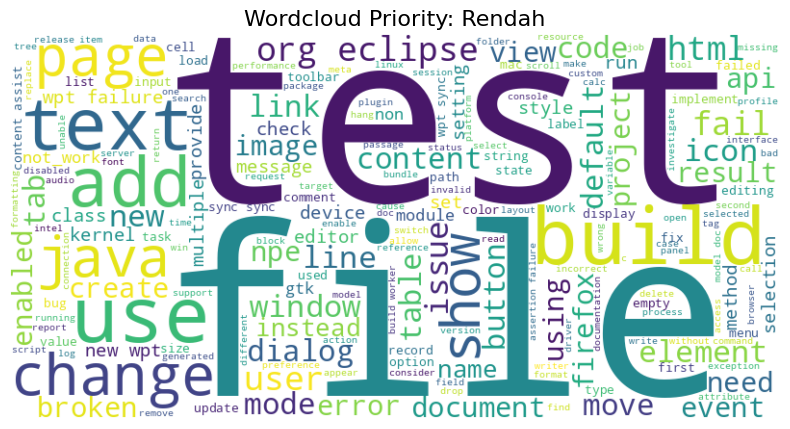

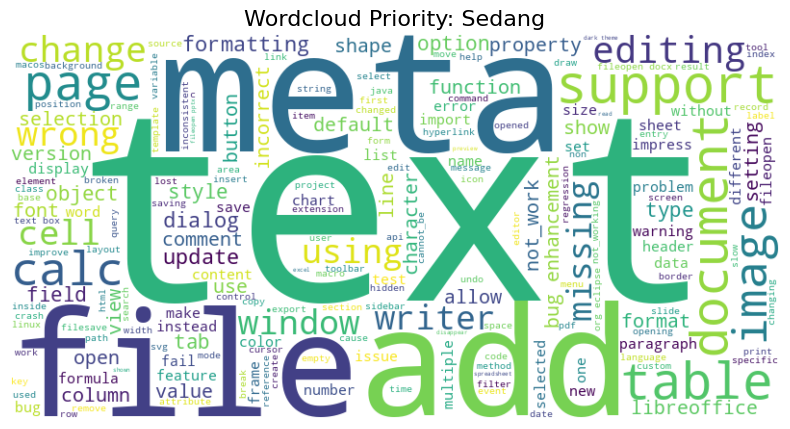

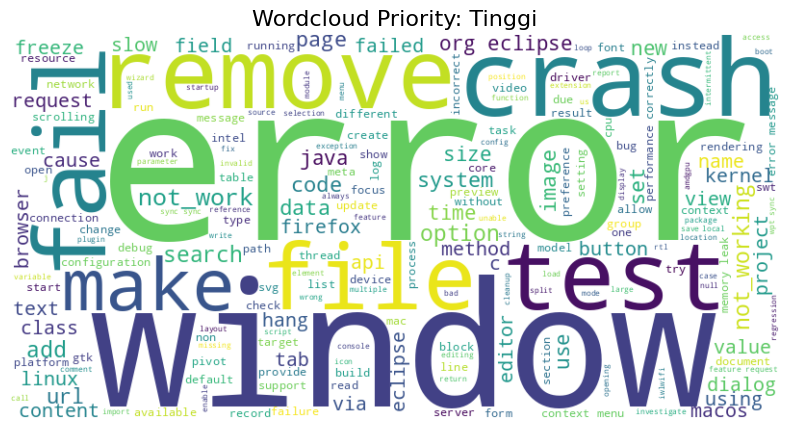

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

for priority_label in ['Rendah', 'Sedang', 'Tinggi']:
    priority_data = combined_df[combined_df['Priority'] == priority_label]
    text = ' '.join(priority_data['Processed_Summary'])
    generate_wordcloud(text, f'Wordcloud Priority: {priority_label}')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

for priority_label in ['Rendah', 'Sedang', 'Tinggi']:
    priority_data = combined_df[combined_df['Priority'] == priority_label]
    top_words = get_top_n_words(priority_data['Processed_Summary'], n=30)
    print(f"Top 30 words for Priority: {priority_label}")
    for word, freq in top_words:
        print(f"{word}: {freq}")

Top 30 words for Priority: Rendah
test: 885
build: 742
file: 660
eclipse: 654
use: 521
html: 513
new: 501
text: 501
failure: 458
java: 433
add: 395
page: 372
content: 368
org: 367
change: 355
line: 337
code: 322
user: 315
show: 309
wpt: 296
mode: 284
api: 273
element: 271
kernel: 269
error: 263
issue: 262
sync: 260
table: 235
tab: 232
gtk: 231
Top 30 words for Priority: Sedang
text: 1577
file: 1445
page: 1372
table: 1347
meta: 1280
add: 1226
document: 1052
cell: 1031
support: 993
image: 955
fileopen: 953
style: 898
bug: 892
calc: 880
dialog: 855
change: 839
writer: 820
line: 812
editing: 771
wrong: 750
formatting: 726
object: 664
option: 661
docx: 654
type: 651
libreoffice: 616
update: 613
missing: 597
using: 593
tab: 573
Top 30 words for Priority: Tinggi
error: 1172
crash: 497
window: 470
remove: 428
eclipse: 360
test: 304
make: 287
fails: 282
file: 279
not_work: 251
system: 242
not_working: 238
search: 225
kernel: 218
page: 216
time: 205
option: 204
data: 202
image: 201
code: 199
jav


##Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(combined_df['Priority'])

print ("Label classes:", label_encoder.classes_)

Label classes: ['Rendah' 'Sedang' 'Tinggi']


In [ ]:
label_mapping = {idx: label for idx, label in enumerate(label_encoder.classes_)}
print("Label mapping:", label_mapping)

Label mapping: {0: 'Rendah', 1: 'Sedang', 2: 'Tinggi'}


##Modelling

In [ ]:
X = padded_sequences
y = y_encoded

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [ ]:
def create_lstm_model(input_length):
  optimizer = Adam(learning_rate=0.01)
  vocab_size = len(vocab) + 1

  model = Sequential()
  model.add(Embedding(input_dim=vocab_size, output_dim=50))
  model.add(SpatialDropout1D(0.2))
  model.add(LSTM(64, return_sequences=False))
  model.add(Dropout(0.1))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(len(label_encoder.classes_), activation='softmax'))

  model.build(input_shape=(None, input_length))
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
input_length = padded_sequences.shape[1]
model = create_lstm_model(input_length)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 12, 50)         │     1,570,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 12, 50)         │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,601,769 (6.11 MB)

 Trainable params: 1,601,769 (6.11 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def create_stacked_lstm_model(input_length):
    optimizer = Adam(learning_rate=0.01)
    vocab_size = len(vocab) + 1

    model = Sequential()
    model.add(Embedding(input_dim=vocab_size + 1, output_dim=150))
    model.add(SpatialDropout1D(0.3))
    model.add(LSTM(32, return_sequences=True))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.build(input_shape=(None, input_length))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model1 = create_stacked_lstm_model(input_length)
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 12, 150)        │     4,710,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ (None, 12, 150)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 12, 32)         │        23,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,744,651 (18.10 MB)

 Trainable params: 4,744,651 (18.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def create_bilstm_model(input_length):
    optimizer = Adam(learning_rate=0.01)
    vocab_size = len(vocab) + 1

    model = Sequential()
    model.add(Embedding(input_dim=vocab_size + 1, output_dim=100))
    model.add(SpatialDropout1D(0.2))
    model.add(Bidirectional(LSTM(128, return_sequences=False)))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.build(input_shape=(None, input_length))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model2 = create_bilstm_model(input_length)
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 12, 100)        │     3,140,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_2             │ (None, 12, 100)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       234,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,383,219 (12.91 MB)

 Trainable params: 3,383,219 (12.91 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

##Evaluasi Model

In [ ]:
# Cek shape data yang sudah di-pad
print(f"Shape padded_sequences: {padded_sequences.shape}")
print(f"Max_length yang digunakan: {max_length}")

# Cek apakah konsisten
X = np.array(padded_sequences)
print(f"Shape X: {X.shape}")
print(f"X.shape[1] (panjang sequence): {X.shape[1]}")

# Cek di beberapa fold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
for i, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train_fold = X[train_idx]
    print(f"Fold {i+1} - X_train_fold.shape: {X_train_fold.shape}")

Shape padded_sequences: (46976, 12)
Max_length yang digunakan: 12
Shape X: (46976, 12)
X.shape[1] (panjang sequence): 12
Fold 1 - X_train_fold.shape: (31317, 12)
Fold 2 - X_train_fold.shape: (31317, 12)
Fold 3 - X_train_fold.shape: (31318, 12)


###Parameter 3

In [ ]:
def evaluate_model(X, y, model_fn, num_folds=3, save_plot_as='conf_matrix.png'):
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    fold_no = 1
    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []
    cm_list = []

    all_y_test = []
    all_y_pred = []

    for train_idx, test_idx in skf.split(X, y):
        print(f"\nTraining fold {fold_no}/{num_folds}")

        X_train_fold, X_test_fold = X[train_idx], X[test_idx]
        y_train_fold, y_test_fold = y[train_idx], y[test_idx]

        train_class_distribution = np.bincount(y_train_fold)
        test_class_distribution = np.bincount(y_test_fold)

        print(f"Distribusi kelas train fold {fold_no}: {train_class_distribution}")
        print(f"Distribusi kelas test fold {fold_no}: {test_class_distribution}")

        model = model_fn(input_length=X_train_fold.shape[1])

        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

        history = model.fit(
            X_train_fold, y_train_fold,
            epochs=30,
            batch_size=128,
            validation_data=(X_test_fold, y_test_fold),
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )

        y_pred_prob = model.predict(X_test_fold)
        y_pred = np.argmax(y_pred_prob, axis=1)

        all_y_test.extend(y_test_fold)
        all_y_pred.extend(y_pred)

        acc = accuracy_score(y_test_fold, y_pred)
        prec = precision_score(y_test_fold, y_pred, average='macro')
        rec = recall_score(y_test_fold, y_pred, average='macro')
        f1 = f1_score(y_test_fold, y_pred, average='macro')
        cm = confusion_matrix(y_test_fold, y_pred)

        acc_scores.append(acc)
        prec_scores.append(prec)
        rec_scores.append(rec)
        f1_scores.append(f1)
        cm_list.append(cm)

        print(f"Fold {fold_no} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}")
        print("Classification Report:")
        print(classification_report(y_test_fold, y_pred, target_names=label_encoder.classes_))

        fold_no += 1

    print("\n--- HASIL EVALUASI KESELURUHAN ---")
    print(f"Accuracy: {np.mean(acc_scores):.4f} ± {np.std(acc_scores):.4f}")
    print(f"Precision: {np.mean(prec_scores):.4f} ± {np.std(prec_scores):.4f}")
    print(f"Recall: {np.mean(rec_scores):.4f} ± {np.std(rec_scores):.4f}")
    print(f"F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

    # Classification report untuk semua fold
    print("\nClassification Report (Keseluruhan):")
    print(classification_report(all_y_test, all_y_pred, target_names=label_encoder.classes_))

    # Plot average confusion matrix
    plt.figure(figsize=(10, 8))
    avg_cm = np.mean(cm_list, axis=0).astype(int)
    sns.heatmap(avg_cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Average Confusion Matrix Across All Folds')
    plt.tight_layout()
    plt.savefig(save_plot_as)

    return {
      'Accuracy': np.mean(acc_scores),
      'Precision': np.mean(prec_scores),
      'Recall': np.mean(rec_scores),
      'F1-Score': np.mean(f1_scores)
    }



Training fold 1/3
Distribusi kelas train fold 1: [10248 15790  5279]
Distribusi kelas test fold 1: [5124 7896 2639]
Epoch 1/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6415 - loss: 0.8361 - val_accuracy: 0.7740 - val_loss: 0.6009 - learning_rate: 0.0100
Epoch 2/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8217 - loss: 0.4940 - val_accuracy: 0.7783 - val_loss: 0.5927 - learning_rate: 0.0100
Epoch 3/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8807 - loss: 0.3322 - val_accuracy: 0.7651 - val_loss: 0.6674 - learning_rate: 0.0100
Epoch 4/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9163 - loss: 0.2460 - val_accuracy: 0.7598 - val_loss: 0.8129 - learning_rate: 0.0100
Epoch 5/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9347 - loss: 0.1895 - val_accuracy: 0.7576 - val_loss: 0.8398 - learning_rate: 0.0100
490/490 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fold 1 - Accuracy: 0.7783, Precision: 0.7649, Recall: 0.7495, F1-Score: 0.7529
C

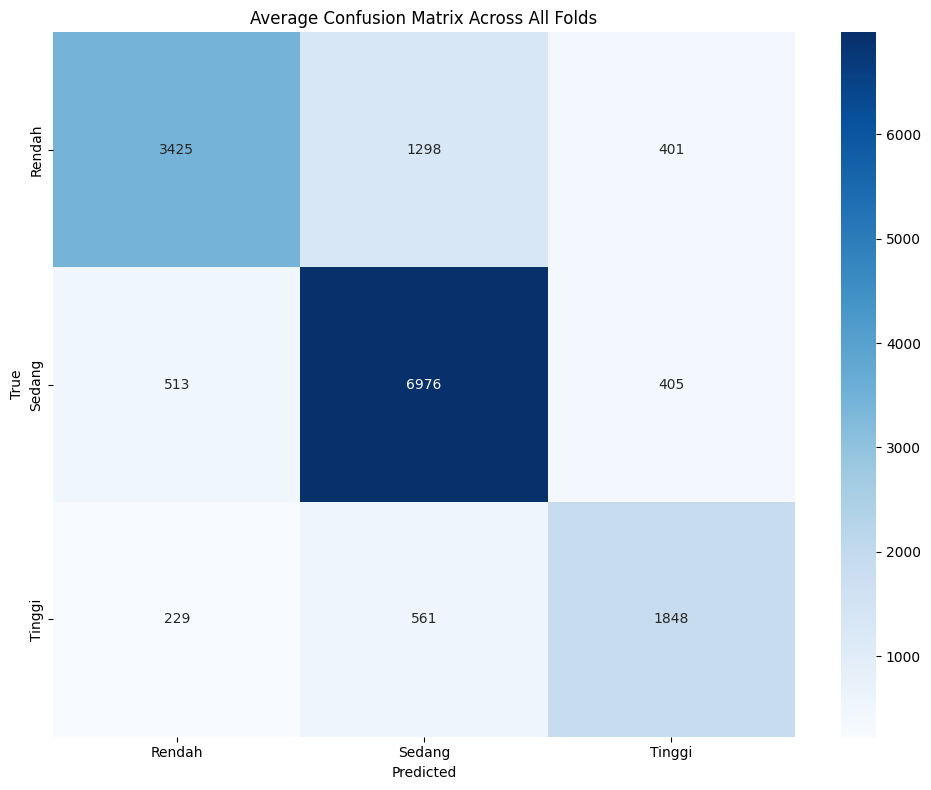

In [ ]:
result_lstm = evaluate_model(X, y, model_fn=create_lstm_model, save_plot_as='conf_matrix_lstm.png')


Training fold 1/3
Distribusi kelas train fold 1: [10248 15790  5279]
Distribusi kelas test fold 1: [5124 7896 2639]
Epoch 1/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6604 - loss: 0.7987 - val_accuracy: 0.7806 - val_loss: 0.5897 - learning_rate: 0.0100
Epoch 2/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8378 - loss: 0.4553 - val_accuracy: 0.7575 - val_loss: 0.6479 - learning_rate: 0.0100
Epoch 3/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8935 - loss: 0.3084 - val_accuracy: 0.7668 - val_loss: 0.6718 - learning_rate: 0.0100
Epoch 4/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9233 - loss: 0.2254 - val_accuracy: 0.7658 - val_loss: 0.7159 - learning_rate: 0.0100
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Fold 1 - Accuracy: 0.7806, Precision: 0.7823, Recall: 0.7389, F1-Score: 0.7514
Classification Report:
              precision    recall  f1-score   support

      Rendah       0.86      0.62      0.72      5124
      Sedang       

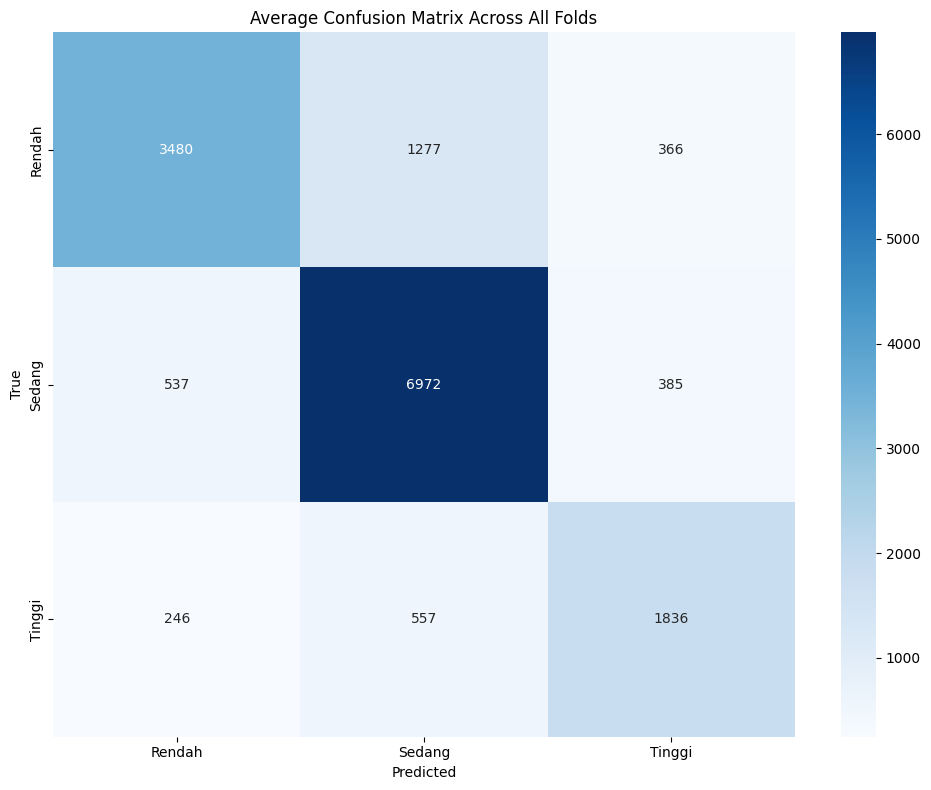

In [ ]:
result_stacked = evaluate_model(X, y, model_fn=create_stacked_lstm_model, save_plot_as='conf_matrix_stacked.png')


Training fold 1/3
Distribusi kelas train fold 1: [10248 15790  5279]
Distribusi kelas test fold 1: [5124 7896 2639]
Epoch 1/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6536 - loss: 0.7991 - val_accuracy: 0.7855 - val_loss: 0.5662 - learning_rate: 0.0100
Epoch 2/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8369 - loss: 0.4517 - val_accuracy: 0.7817 - val_loss: 0.5637 - learning_rate: 0.0100
Epoch 3/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8936 - loss: 0.3008 - val_accuracy: 0.7731 - val_loss: 0.6391 - learning_rate: 0.0100
Epoch 4/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9249 - loss: 0.2139 - val_accuracy: 0.7757 - val_loss: 0.8200 - learning_rate: 0.0100
Epoch 5/30
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9405 - loss: 0.1618 - val_accuracy: 0.7768 - val_loss: 0.8902 - learning_rate: 0.0100
490/490 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Fold 1 - Accuracy: 0.7817, Precision: 0.7799, Recall: 0.7328, F1-Score: 0.750

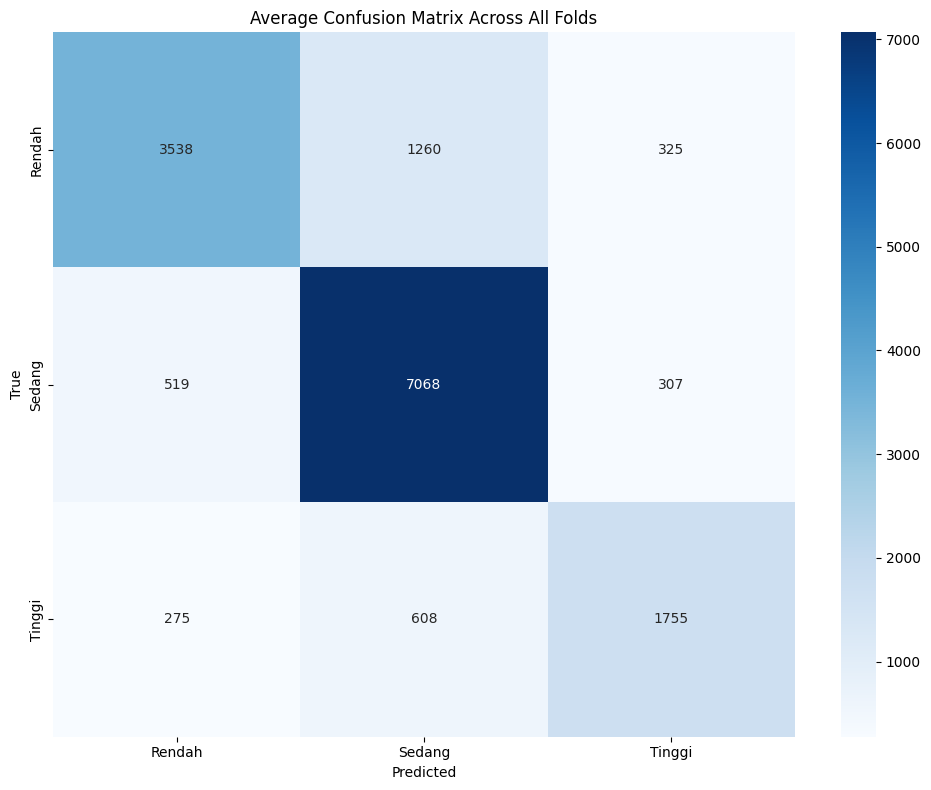

In [ ]:
result_bilstm = evaluate_model(X, y, model_fn=create_bilstm_model, save_plot_as='conf_matrix_bilstm.png')

In [ ]:
param_desc = "3"

df_results = pd.DataFrame([
    {'Model': 'LSTM', **result_lstm, 'K': param_desc},
    {'Model': 'Stacked LSTM', **result_stacked, 'K': param_desc},
    {'Model': 'BiLSTM', **result_bilstm, 'K': param_desc}
])

print(df_results)

          Model  Accuracy  Precision    Recall  F1-Score  K
0          LSTM  0.782293   0.769828  0.750777  0.756469  3
1  Stacked LSTM  0.784805   0.775257  0.752664  0.759464  3
2        BiLSTM  0.789510   0.781642  0.750341  0.761981  3


In [ ]:
df_results.to_csv("hasil_perbandingan_model_K3.csv", index=False)

In [ ]:
best_model = df_results.loc[df_results['F1-Score'].idxmax()]
print("\nModel terbaik secara keseluruhan:")
print(best_model)


Model terbaik secara keseluruhan:
Model          BiLSTM
Accuracy      0.78951
Precision    0.781642
Recall       0.750341
F1-Score     0.761981
K                   3
Name: 2, dtype: object


###Parameter 5

In [ ]:
def evaluate_model(X, y, model_fn, num_folds=5, save_plot_as='conf_matrix.png'):
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    fold_no = 1
    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []
    cm_list = []

    all_y_test = []
    all_y_pred = []

    for train_idx, test_idx in skf.split(X, y):
        print(f"\nTraining fold {fold_no}/{num_folds}")

        X_train_fold, X_test_fold = X[train_idx], X[test_idx]
        y_train_fold, y_test_fold = y[train_idx], y[test_idx]

        train_class_distribution = np.bincount(y_train_fold)
        test_class_distribution = np.bincount(y_test_fold)

        print(f"Distribusi kelas train fold {fold_no}: {train_class_distribution}")
        print(f"Distribusi kelas test fold {fold_no}: {test_class_distribution}")

        model = model_fn(input_length=X_train_fold.shape[1])

        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

        history = model.fit(
            X_train_fold, y_train_fold,
            epochs=30,
            batch_size=128,
            validation_data=(X_test_fold, y_test_fold),
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )

        y_pred_prob = model.predict(X_test_fold)
        y_pred = np.argmax(y_pred_prob, axis=1)

        all_y_test.extend(y_test_fold)
        all_y_pred.extend(y_pred)

        acc = accuracy_score(y_test_fold, y_pred)
        prec = precision_score(y_test_fold, y_pred, average='macro')
        rec = recall_score(y_test_fold, y_pred, average='macro')
        f1 = f1_score(y_test_fold, y_pred, average='macro')
        cm = confusion_matrix(y_test_fold, y_pred)

        acc_scores.append(acc)
        prec_scores.append(prec)
        rec_scores.append(rec)
        f1_scores.append(f1)
        cm_list.append(cm)

        print(f"Fold {fold_no} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}")
        print("Classification Report:")
        print(classification_report(y_test_fold, y_pred, target_names=label_encoder.classes_))

        fold_no += 1

    print("\n--- HASIL EVALUASI KESELURUHAN ---")
    print(f"Accuracy: {np.mean(acc_scores):.4f} ± {np.std(acc_scores):.4f}")
    print(f"Precision: {np.mean(prec_scores):.4f} ± {np.std(prec_scores):.4f}")
    print(f"Recall: {np.mean(rec_scores):.4f} ± {np.std(rec_scores):.4f}")
    print(f"F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

    # Classification report untuk semua fold
    print("\nClassification Report (Keseluruhan):")
    print(classification_report(all_y_test, all_y_pred, target_names=label_encoder.classes_))

    # Plot average confusion matrix
    plt.figure(figsize=(10, 8))
    avg_cm = np.mean(cm_list, axis=0).astype(int)
    sns.heatmap(avg_cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Average Confusion Matrix Across All Folds')
    plt.tight_layout()
    plt.savefig(save_plot_as)

    return {
      'Accuracy': np.mean(acc_scores),
      'Precision': np.mean(prec_scores),
      'Recall': np.mean(rec_scores),
      'F1-Score': np.mean(f1_scores)
    }



Training fold 1/5
Distribusi kelas train fold 1: [12298 18948  6334]
Distribusi kelas test fold 1: [3074 4738 1584]
Epoch 1/30
294/294 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6829 - loss: 0.7643 - val_accuracy: 0.7986 - val_loss: 0.5521 - learning_rate: 0.0100
Epoch 2/30
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8420 - loss: 0.4316 - val_accuracy: 0.7987 - val_loss: 0.5774 - learning_rate: 0.0100
Epoch 3/30
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8949 - loss: 0.2913 - val_accuracy: 0.7877 - val_loss: 0.6104 - learning_rate: 0.0100
Epoch 4/30
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9215 - loss: 0.2176 - val_accuracy: 0.7742 - val_loss: 0.7644 - learning_rate: 0.0100
294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Fold 1 - Accuracy: 0.7986, Precision: 0.7982, Recall: 0.7590, F1-Score: 0.7713
Classification Report:
              precision    recall  f1-score   support

      Rendah       0.88      0.66      0.75      3074
      Sedang       0.

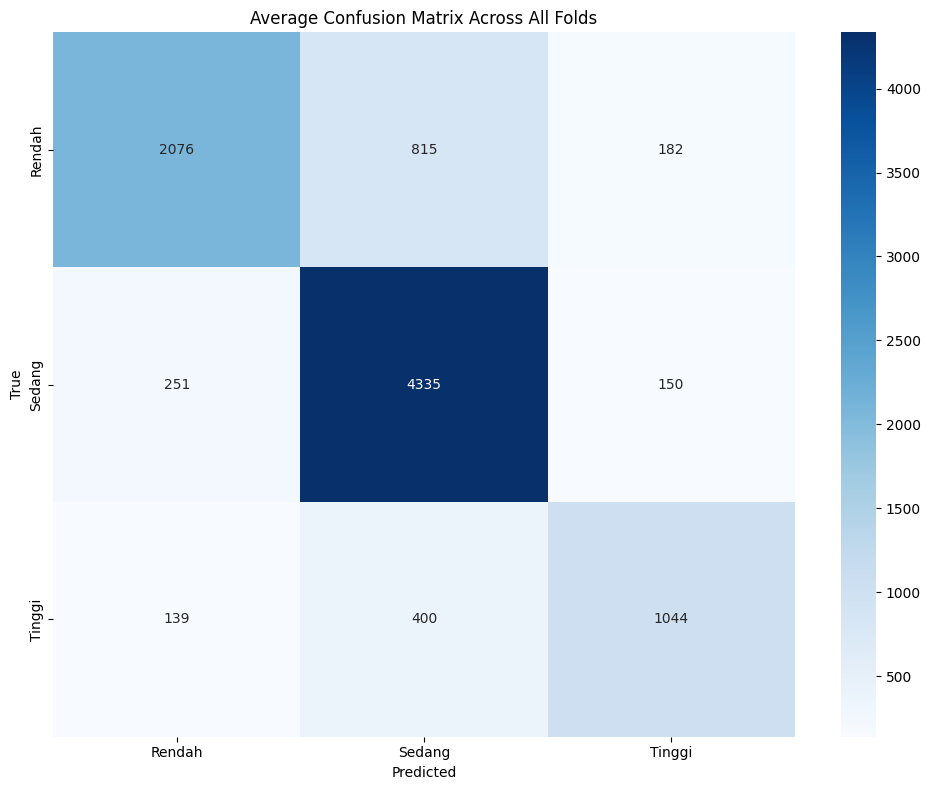

In [ ]:
result_bilstm_K5 = evaluate_model(X, y, model_fn=create_bilstm_model, save_plot_as='conf_matrix_bilstm_k5.png')

###Parameter 10

In [ ]:
def evaluate_model(X, y, model_fn, num_folds=10, save_plot_as='conf_matrix.png'):
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    fold_no = 1
    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []
    cm_list = []

    all_y_test = []
    all_y_pred = []

    for train_idx, test_idx in skf.split(X, y):
        print(f"\nTraining fold {fold_no}/{num_folds}")

        X_train_fold, X_test_fold = X[train_idx], X[test_idx]
        y_train_fold, y_test_fold = y[train_idx], y[test_idx]

        train_class_distribution = np.bincount(y_train_fold)
        test_class_distribution = np.bincount(y_test_fold)

        print(f"Distribusi kelas train fold {fold_no}: {train_class_distribution}")
        print(f"Distribusi kelas test fold {fold_no}: {test_class_distribution}")

        model = model_fn(input_length=X_train_fold.shape[1])

        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

        history = model.fit(
            X_train_fold, y_train_fold,
            epochs=30,
            batch_size=128,
            validation_data=(X_test_fold, y_test_fold),
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )

        y_pred_prob = model.predict(X_test_fold)
        y_pred = np.argmax(y_pred_prob, axis=1)

        all_y_test.extend(y_test_fold)
        all_y_pred.extend(y_pred)

        acc = accuracy_score(y_test_fold, y_pred)
        prec = precision_score(y_test_fold, y_pred, average='macro')
        rec = recall_score(y_test_fold, y_pred, average='macro')
        f1 = f1_score(y_test_fold, y_pred, average='macro')
        cm = confusion_matrix(y_test_fold, y_pred)

        acc_scores.append(acc)
        prec_scores.append(prec)
        rec_scores.append(rec)
        f1_scores.append(f1)
        cm_list.append(cm)

        print(f"Fold {fold_no} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}")
        print("Classification Report:")
        print(classification_report(y_test_fold, y_pred, target_names=label_encoder.classes_))

        fold_no += 1

    print("\n--- HASIL EVALUASI KESELURUHAN ---")
    print(f"Accuracy: {np.mean(acc_scores):.4f} ± {np.std(acc_scores):.4f}")
    print(f"Precision: {np.mean(prec_scores):.4f} ± {np.std(prec_scores):.4f}")
    print(f"Recall: {np.mean(rec_scores):.4f} ± {np.std(rec_scores):.4f}")
    print(f"F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

    # Classification report untuk semua fold
    print("\nClassification Report (Keseluruhan):")
    print(classification_report(all_y_test, all_y_pred, target_names=label_encoder.classes_))

    # Plot average confusion matrix
    plt.figure(figsize=(10, 8))
    avg_cm = np.mean(cm_list, axis=0).astype(int)
    sns.heatmap(avg_cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Average Confusion Matrix Across All Folds')
    plt.tight_layout()
    plt.savefig(save_plot_as)

    return {
      'Accuracy': np.mean(acc_scores),
      'Precision': np.mean(prec_scores),
      'Recall': np.mean(rec_scores),
      'F1-Score': np.mean(f1_scores)
    }



Training fold 1/10
Distribusi kelas train fold 1: [13835 21317  7126]
Distribusi kelas test fold 1: [1537 2369  792]
Epoch 1/30
331/331 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6846 - loss: 0.7538 - val_accuracy: 0.7929 - val_loss: 0.5571 - learning_rate: 0.0100
Epoch 2/30
331/331 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8527 - loss: 0.4132 - val_accuracy: 0.7914 - val_loss: 0.5586 - learning_rate: 0.0100
Epoch 3/30
331/331 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8928 - loss: 0.2957 - val_accuracy: 0.7893 - val_loss: 0.6423 - learning_rate: 0.0100
Epoch 4/30
331/331 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9228 - loss: 0.2155 - val_accuracy: 0.7771 - val_loss: 0.7750 - learning_rate: 0.0100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Fold 1 - Accuracy: 0.7929, Precision: 0.7870, Recall: 0.7610, F1-Score: 0.7692
Classification Report:
              precision    recall  f1-score   support

      Rendah       0.84      0.67      0.74      1537
      Sedang       0

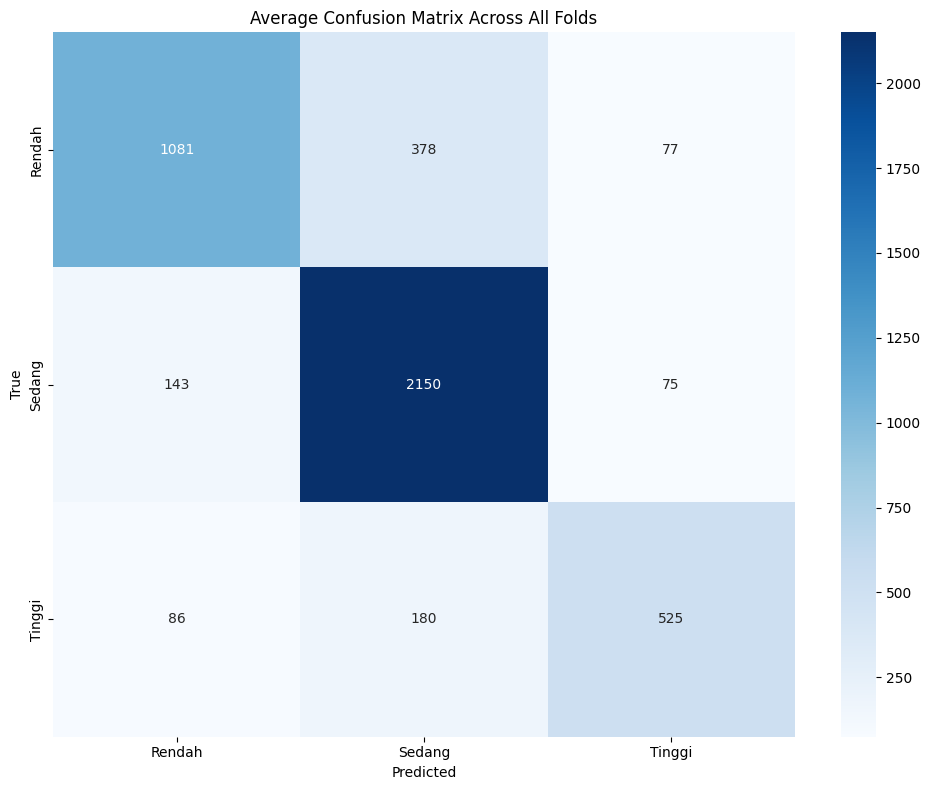

In [ ]:
result_bilstm_K10 = evaluate_model(X, y, model_fn=create_bilstm_model,save_plot_as='conf_matrix_bilstm_k10.png')

In [ ]:
df_results = pd.DataFrame([
    {'Model': 'BiLSTM 1', **result_bilstm, 'K': '3'},
    {'Model': 'BiLSTM 2', **result_bilstm_K5, 'K': '5'},
    {'Model': 'BiLSTM 3', **result_bilstm_K10, 'K': '10'}
])

print(df_results)

      Model  Accuracy  Precision    Recall  F1-Score   K
0  BiLSTM 1  0.789510   0.781642  0.750341  0.761981   3
1  BiLSTM 2  0.793639   0.794130  0.749991  0.765811   5
2  BiLSTM 3  0.799791   0.799011  0.758218  0.773512  10


##Test Best Model

In [ ]:
X_all = np.array(padded_sequences)
y_all = y_encoded

In [ ]:
final_model = create_bilstm_model(input_length=X_all.shape[1])
final_model.fit(X_all, y_all, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6810 - loss: 0.7774
Epoch 2/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8487 - loss: 0.4241
Epoch 3/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8916 - loss: 0.3038
Epoch 4/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9157 - loss: 0.2391
Epoch 5/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9315 - loss: 0.1940
Epoch 6/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9377 - loss: 0.1721
Epoch 7/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9418 - loss: 0.1625
Epoch 8/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9451 - loss: 0.1530
Epoch 9/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9487 - loss: 0.1419
Epoch 10/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9475 - loss: 0.1439


In [ ]:
y_pred_prob = final_model.predict(X_all)
y_pred = np.argmax(y_pred_prob, axis=1)

1468/1468 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [ ]:
accuracy = accuracy_score(y_all, y_pred)
precision = precision_score(y_all, y_pred, average=None)
recall = recall_score(y_all, y_pred, average=None)
f1 = f1_score(y_all, y_pred, average=None)

print(f"Accuracy: {accuracy:.4f}")
for i, (p, r, f) in enumerate(zip(precision, recall, f1)):
    print(f"Class {i} - Precision: {p:.4f}, Recall: {r:.4f}, F1-Score: {f:.4f}")

Accuracy: 0.9668
Class 0 - Precision: 0.9833, Recall: 0.9407, F1-Score: 0.9615
Class 1 - Precision: 0.9562, Recall: 0.9892, F1-Score: 0.9724
Class 2 - Precision: 0.9687, Recall: 0.9504, F1-Score: 0.9595


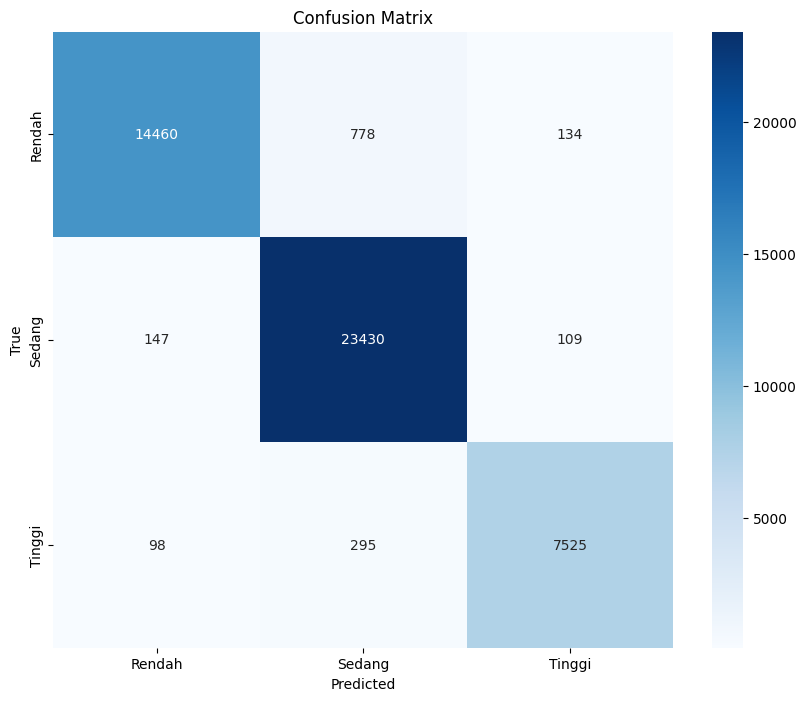

In [ ]:
cm = confusion_matrix(y_all, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##Test New Sentences

In [ ]:
final_model.save('final_model.keras')
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('final_model.keras')
with open('label_encoder.pkl', 'rb') as f:
    loaded_label_encoder = pickle.load(f)

In [ ]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
new_sentences_df = pd.read_csv('bugs-2025-05-04 - Copy.csv')
print(new_sentences_df.head())

new_sentences = new_sentences_df['Summary'].tolist()

new_processed_data = []
for sentence in new_sentences:
    processed_text, lemmatized_words = show_preprocessing_steps(sentence)
    new_processed_data.append(lemmatized_words)

new_tokens = new_processed_data

new_sequences = [tokens_to_sequences(tokens, vocab) for tokens in new_tokens]
new_padded_sequences = pad_sequences(new_sequences, maxlen=12, padding='post', truncating='post')

y_pred_prob = loaded_model.predict(new_padded_sequences)
y_pred = np.argmax(y_pred_prob, axis=1)

predicted_classes = loaded_label_encoder.inverse_transform(y_pred)

new_sentences_df['Predicted Class'] = predicted_classes
print(new_sentences_df)

# DEBUGGING: Lihat perbedaan preprocessing
print("\n=== DEBUGGING PREPROCESSING ===")
test_sentence = "Unable to add text . text boxes to any header/footer in Base"

_, new_tokens_sample = show_preprocessing_steps(test_sentence)
print(f"New method: {new_tokens_sample}")

                                             Summary
0  Unable to add text . text boxes to any header/...
1  Properly implement ODF style:writing-mode for ...
2  FILEOPEN CSV Apparent faulty input of a field ...
3  LibreOffice comments style formatting is unsta...
4  CRASH in SfxTabDialogController::ResetHdl(weld...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
                                             Summary Predicted Class
0  Unable to add text . text boxes to any header/...          Sedang
1  Properly implement ODF style:writing-mode for ...          Sedang
2  FILEOPEN CSV Apparent faulty input of a field ...          Sedang
3  LibreOffice comments style formatting is unsta...          Sedang
4  CRASH in SfxTabDialogController::ResetHdl(weld...          Sedang
5                    Label Printing - Libre 25.2.2.2          Sedang
6  \tCRASH: Opening print dialog after print preview          Sedang
7                    [META] Complete ODF-1.0 Support          Sedang
8  The full screen too

In [ ]:
new_sentences_df = pd.read_csv('bugs-2025-05-04 - Copy.csv')
print(new_sentences_df.head())

new_sentences = new_sentences_df['Summary'].tolist()

new_processed_data = []
for sentence in new_sentences:
    processed_text, lemmatized_words = show_preprocessing_steps(sentence)
    new_processed_data.append(lemmatized_words)

new_tokens = new_processed_data

new_sequences = [tokens_to_sequences(tokens, vocab) for tokens in new_tokens]
new_padded_sequences = pad_sequences(new_sequences, maxlen=12, padding='post', truncating='post')

y_pred_prob = loaded_model.predict(new_padded_sequences)
y_pred = np.argmax(y_pred_prob, axis=1)

predicted_classes = loaded_label_encoder.inverse_transform(y_pred)

new_sentences_df['Predicted Class'] = predicted_classes
print(new_sentences_df)

# DEBUGGING: Lihat perbedaan preprocessing
print("\n=== DEBUGGING PREPROCESSING ===")
test_sentence = "Unable to add text . text boxes to any header/footer in Base"

# Cara lama (salah)
old_tokens = word_tokenize(test_sentence.lower())
print(f"Old method: {old_tokens}")

# Cara baru (benar)
_, new_tokens_sample = show_preprocessing_steps(test_sentence)
print(f"New method: {new_tokens_sample}")

print(f"Same result: {old_tokens == new_tokens_sample}")

                                             Summary
0  Unable to add text . text boxes to any header/...
1  Properly implement ODF style:writing-mode for ...
2  FILEOPEN CSV Apparent faulty input of a field ...
3  LibreOffice comments style formatting is unsta...
4  CRASH in SfxTabDialogController::ResetHdl(weld...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
                                             Summary Predicted Class
0  Unable to add text . text boxes to any header/...          Sedang
1  Properly implement ODF style:writing-mode for ...          Sedang
2  FILEOPEN CSV Apparent faulty input of a field ...          Sedang
3  LibreOffice comments style formatting is unsta...          Sedang
4  CRASH in SfxTabDialogController::ResetHdl(weld...          Sedang
5                    Label Printing - Libre 25.2.2.2          Sedang
6  \tCRASH: Opening print dialog after print preview          Sedang
7                    [META] Complete ODF-1.0 Support          Sedang
8  The full screen tool